#Chapter 10: Introduction to Artificial Neural Networks with Keras

Use this notebook as the starting point for this chapter.

## Writeup

Use the [Unit 3 Writeup](https://docs.google.com/document/d/1tA9mpPPjr1Y8FhZgXRDzyleiWEo0-DsIEKtPCbXZIe8/copy) to answer the questions posed in this notebook

## Walkthrough Video

Watch the [Learning Chapter 10a Walkthough Video by Tom](https://www.youtube.com/watch?v=4HQWh9apEp8)

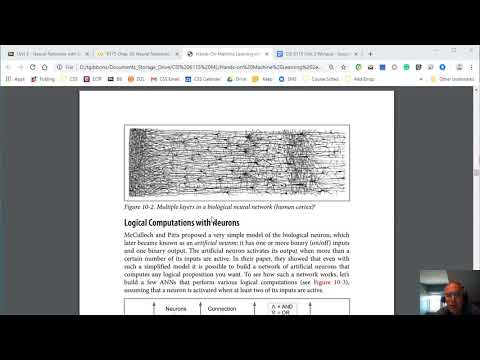

In [0]:
# Display video link below
from IPython.lib.display import YouTubeVideo
YouTubeVideo('4HQWh9apEp8')

# Section 0

=== *You must run this section to set up things for any of the sections below * ===



## Setting up Python tools

We'll use three libraries for this tutorial: 
- [pandas](http://pandas.pydata.org/) : dataframes for spreadsheet-like data analysis, reading CSV files, time series
- [numpy](http://www.numpy.org/) : for multidimensional data and linear algebra tools
- [matplotlib](http://matplotlib.org/) : Simple plotting and graphing
- [seaborn](http://stanford.edu/~mwaskom/software/seaborn/) : more advanced graphing
-  [scikit-learn](https://scikit-learn.org/stable/) : provides many machine learning algorithms and tools to training and test.



In [1]:
# First, we'll import pandas and numpy, two data processing libraries
import pandas as pd
import numpy as np

# We'll also import seaborn and matplot, twp Python graphing libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Import the needed sklearn libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# The Keras library provides support for neural networks and deep learning
# Use the updated Keras library from Tensorflow -- provides support for neural networks and deep learning
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Lambda, Flatten, LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
#from keras.utils import np_utils

# We will turn off some warns in this notebook to make it easier to read for new students
import warnings
warnings.filterwarnings('ignore')

print ("All libraries imported")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


All libraries imported


## The data sets
We will work with the following data sets:
- Section I: Iris flower dataset from Practice 2 & 4
- Section II: Breast cancer data from Project 1 & 2
- Section III: [MNIST](https://en.wikipedia.org/wiki/MNIST_database) handwritten digits. This is our first image data set. Each image is 16x16 grayscale pixels. 
<p>


# Section 1: From Biological to Artificial Neurons
=== *You must run Section 0 before this section* ===





From *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems*, 2nd Edition by Aurélien Géron, ISBN-13: 978-1492032649 

> ANNs are at the very core of Deep Learning. They are versatile, powerful, and scalable, making them ideal to tackle large and highly complex Machine Learning tasks, such as classifying billions of images (e.g., Google Images), powering speech recognition services (e.g., Apple’s Siri), recommending the best videos to watch to hundreds of millions of users every day (e.g., YouTube), or learning to beat the world champion at the game of Go by playing millions of games against itself (DeepMind’s Alpha‐Zero).

Read the first portion of Chap 10 of *Hands-On Machine Learning*. 

## The Perceptron

From *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems*, 2nd Edition by Aurélien Géron, ISBN-13: 978-1492032649 

> The Perceptron is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt.

![Image of Perceptron](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Perceptron_moj.png/320px-Perceptron_moj.png)


## Activation Function
A perceptron unit will calculate the weighted sum of all of its inputs. This sum is then passed to an activation function to determine the output. 

The output is generally a value between -1.0 and +1.0 where the higher the value the more active the perceptron is. Since the weights can be any positive or negative value and a unit can receive mulitpe inputs, the sum of the inputs can be nearly any value.

Note: some systems restrict the output values to between zero and +1.0 and some systems restrict the weights to only positive values. 

Researchers have experimented with many different activation functions. Some common ones are:

- Step : output of -1 if the input sum is less than zero, otherwise output is +1
- Sigmoid : A smoother version of the step function
- Tanh : Similar to Sigmoid, but with only positive outputs
- ReLU : (Rectified Linear Unit) Simply outputs the sum of the inputs when it is positive, otherwise outputs zero



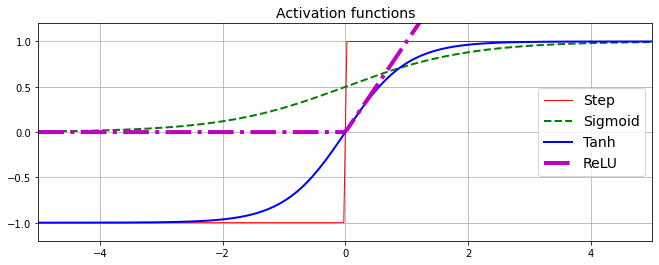

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

# Draw the activation functions
z = np.linspace(-5, 5, 200)
plt.figure(figsize=(11,4))
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=4, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])
plt.show()

## The Multilayer Perceptron and Backpropagation

A Multilayer Perceptron use many perception units connected together in layers. Generally each unit receives input from all the units in the layer below.

The following code sets up a sequential, four layer neural network. Sequential means that each layer is connected to the layer listed before it:
- Input layer: Input values are assigned to these units
- Hidden layer 1: 8 units using Rectified Linear Units (relu)
- Hidden layer 2: 6 units using Rectified Linear Units (relu)
- Output  layer: 3 units using softmax so sum of the three units will be 1.0

![neural network diagram](https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units7and8/master/Iris%20Neural%20Network.png)




In [0]:
# Set up the Neural Network
input_Size = 4
output_Size = 3

Iris_neuralNetwork = Sequential()
Iris_neuralNetwork.add(Dense(8, activation='relu', input_dim=(input_Size)))
Iris_neuralNetwork.add(Dense(6, activation='relu'))
Iris_neuralNetwork.add(Dense(output_Size, activation='softmax'))


## Regression MLPs
From *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems*, 2nd Edition by Aurélien Géron, ISBN-13: 978-1492032649 

> First, MLPs can be used for regression tasks. If you want to predict a single value (e.g., the price of a house, given many of its features), then you just need a single output neuron: its output is the predicted value. For multivariate regression (i.e., to predict multiple values at once), you need one output neuron per output dimension. For example, to locate the center of an object in an image, you need to predict 2D coordinates, so you need two output neurons. 

## Classification MLPs
> MLPs can also be used for classification tasks. For a **binary classification** problem, you just need a single output neuron using the logistic activation function: the output will be a number between 0 and 1, which you can interpret as the estimated probability of the positive class. The estimated probability of the negative class is equal to one minus that number

> If each instance can belong only to a single class, out of three or more possible classes (e.g., classes 0 through 9 for digit image classification), then you need to have one output neuron per class, and you should use the softmax activation function for the whole output layer *(see code above)*. The softmax function (introduced in Chapter 4) will ensure that all the estimated probabilities are between 0 and 1 and that they add up to 1 (which is required if the classes are exclusive). This is called **multiclass classification**.

## Task 1: Understanding Neural Network Basics
Answer the following questions in the [Unit 3 Writeup](https://docs.google.com/document/d/1tA9mpPPjr1Y8FhZgXRDzyleiWEo0-DsIEKtPCbXZIe8/copy).

Complete the following amended version of Exercise 1 from Chapter 10 of the textbook. 

Exercise 1: The [TensorFlow Playgound](https://playground.tensorflow.org/) is a handy neural network simulator built by the TensorFlow team. In this exercise, you will train several binary classifiers in just a few clicks, and tweak the model’s architecture and its hyperparameters to gain some intuition on how neural networks work and what their hyperparameters do. Take some time to explore the following:

[![Playground diagram](https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units7and8/master/playground_small.png)](https://playground.tensorflow.org/)

- a. The patterns learned by a neural net. Try training the default neural network by clicking the Run button (top left). Notice how it quickly finds a good solution for the classification task. The neurons in the first hidden layer have learned simple patterns, while the neurons in the second hidden layer have learned to combine the simple patterns of the first hidden layer into more complex patterns. In general, the more layers there are, the more complex the patterns can be. **(No writeup needed)**
- b. Activation functions. Try replacing the tanh activation function with a ReLU activation function, and train the network again. Notice that it finds a solution even faster, but this time the boundaries are linear. This is due to the shape of the ReLU function. **(No writeup needed)**
- c. The risk of local minima. Modify the network architecture to have just one hidden layer with three neurons. Train it multiple times (to reset the network weights, click the Reset button next to the Play button). Notice that the training time varies a lot, and sometimes it even gets stuck in a local minimum. **(Write up: describe three different runs of the network and how they were different or similar.)**
- d. What happens when neural nets are too small. Remove one neuron to keep just two. Notice that the neural network is now incapable of finding a good solution, even if you try multiple times. The model has too few parameters and systematically underfits the training set. **(No writeup needed)**
- e. What happens when neural nets are large enough. Set the number of neurons to eight, and train the network several times. Notice that it is now consistently fast and never gets stuck. This highlights an important finding in neural network theory: large neural networks almost never get stuck in local minima, and even when they do these local optima are almost as good as the global optimum. However, they can still get stuck on long plateaus for a long time. **(Write up: Try out the four different activation functions. Describe one difference you notice.)**
- f. The risk of vanishing gradients in deep networks. Select the spiral dataset (the bottom-right dataset under “DATA”), and change the network architecture to have four hidden layers with eight neurons each. Notice that training takes much longer and often gets stuck on plateaus for long periods of time. Also notice that the neurons in the highest layers (on the right) tend to evolve faster than the neurons in the lowest layers (on the left). This problem, called the “vanishing gradients” problem, can be alleviated with better weight initialization and other techniques, better optimizers (such as AdaGrad or Adam), or Batch Normalization (discussed in Chapter 11). **(Write up: Try out some different settings and report the best performance you were able to achieve.)** 
- g. Go further. Take an hour or so to play around with other parameters and get a feel for what they do, to build an intuitive understanding about neural networks **(No writeup needed, but feel free to play with this as long as you want.)**



# Section 2: Using the Fashion MNIST dataset
=== *You must run Section 0 before this section* ===





## Implementing MLPs with Keras

From *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems*, 2nd Edition by Aurélien Géron, ISBN-13: 978-1492032649 

> Keras is a high-level Deep Learning API that allows you to easily build, train, evaluate, and execute all sorts of neural networks. 

We will run Keras with Google's Tensorflow deep learning library.

## Installing TensorFlow 2

You do not need to do anything to install Keras or Tensorflow on our notebooks

## Building an Image Classifier Using the Sequential API
> First, we need to load a dataset. In this chapter we will tackle Fashion MNIST, which is a drop-in replacement of MNIST (introduced in Chapter 3). It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits


In [4]:
# Load the fashion mnist dataset from Keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Convert data from 0 to 255 values into 0.0 to 1.0 values
# Also pull out a set of images from validation from the training set
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

4423680/4422102 [==============================] - 0s 0us/step


X_train training data shape of 28x28 pixels greyscale:  (55000, 28, 28)
X_valid validation data shape of 28x28 pixels greyscale: :  (5000, 28, 28)
X_test test data shape of 28x28 pixels greyscale: :  (10000, 28, 28)


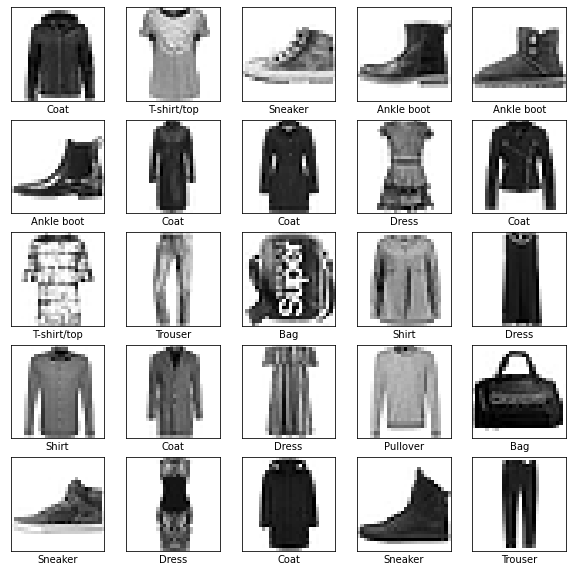

In [5]:
# Display some details about the size of the data set
print ("X_train training data shape of 28x28 pixels greyscale: " ,X_train.shape)
print ("X_valid validation data shape of 28x28 pixels greyscale: : " ,X_valid.shape)
print ("X_test test data shape of 28x28 pixels greyscale: : " ,X_test.shape)
# Display some of the images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [14]:
# Create a sequential Keras model where each layer is automatically connected to the previous layer
model = keras.models.Sequential()                           
model.add(keras.layers.Flatten(input_shape=[28, 28]))       # Define the input layer reading in the 28x28 pixel images
model.add(keras.layers.Dense(50, activation="relu"))       # Define a hidden layer of 300 units.
model.add(keras.layers.Dense(50, activation="relu"))       # Define a second hidden layer of 100 units.
model.add(keras.layers.Dense(10, activation="softmax"))     # Use softmax for mutli-catagory classification output for 10 different classes

print ("Neural Network created")
model.summary()

Neural Network created
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_10 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


## Task 2: Understanding the Network Stucture

Answer the following questions in the [Unit 3 Writeup](https://docs.google.com/document/d/1tA9mpPPjr1Y8FhZgXRDzyleiWEo0-DsIEKtPCbXZIe8/copy).

- 2.1. Why is the input size or dimension set to [28 ,28]? Is this dependent on the data? 
- 2.2. Why is the the output size set to 10? How is this dependent on the data used? How does this relate to the MNIST data?
- 2.3. These networks uses "Dense" hidden layers where each node is connected to every node in the previous layer. Looking at the network diagram below, note Node 3 in Hidden layer 1 is highlighted in the diagram. Which nodes from which layer does Node 3 receive inputs from?
- 2.4. Node 3 in Hidden layer 1 is highlighted in the diagram below. Which nodes from which layer does Node 3 send its outputs to?

![neural network diagram](https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units7and8/master/Iris%20Neural%20Network.png)

In [0]:
# Once the model is defined, it must be compiled
# We will talk more about the optimizer and loss function later
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
     metrics=["accuracy"]
     )

In [16]:
# We train the model with the fit() function. Feeding it the training inputs (X_train) and corresponding output labels (y_train)
# An epoch trains the data on each image once. We generally want to do between 10 and 100 ephochs
# This training can take a few minutes to a few hours. We will start with only 10 epochs to speed things up, but this should really be larger 
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))


Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7766 - accuracy: 0.7395 - val_loss: 0.5365 - val_accuracy: 0.8182
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5151 - accuracy: 0.8212 - val_loss: 0.4697 - val_accuracy: 0.8372
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4693 - accuracy: 0.8360 - val_loss: 0.4422 - val_accuracy: 0.8484
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4431 - accuracy: 0.8444 - val_loss: 0.4218 - val_accuracy: 0.8558
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4250 - accuracy: 0.8513 - val_loss: 0.4316 - val_accuracy: 0.8524
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4096 - accuracy: 0.8561 - val_loss: 0.4350 - val_accuracy: 0.8530
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3968 - accuracy: 0.8595 - val_loss: 0.3868 - val_accuracy:

## Display the training loss and accuracy

> You can see that both the training accuracy and the validation accuracy steadily increase during training, while the training loss and the validation loss decrease. Good! Moreover, the validation curves are close to the training curves, which means that there is not too much overfitting.

The loss measures how different the predictied outputs are from the training outputs. This should go down during training. If it nears 0.00 then more training will not help since you need loss to adjust the weights.

The accuracy is the percent of time the model predicts the correct output. We would like this to get near 1.00 or 100%. If the graph is still going up, more training will likely help.

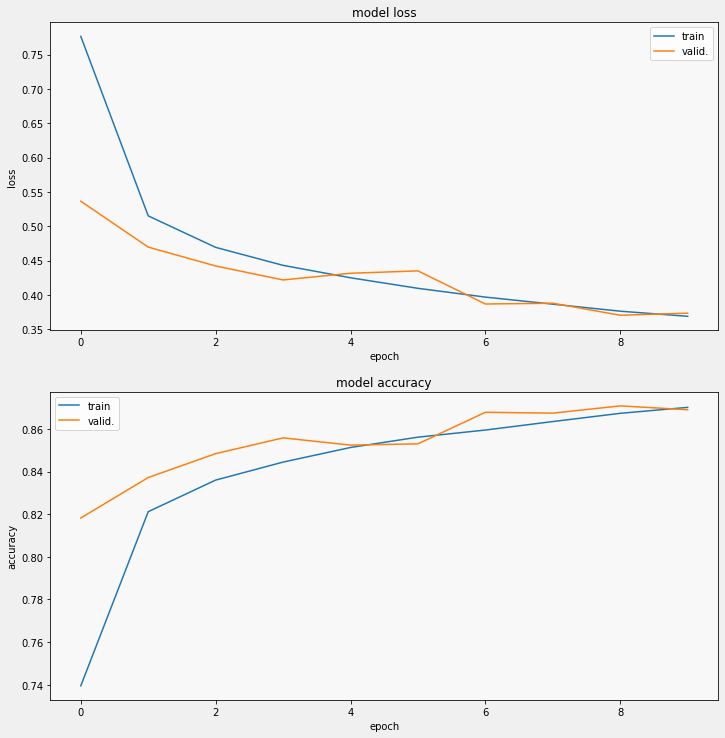

In [17]:
# We will display the loss and the accuracy of the model for each epoch
# NOTE: this is a little fancy display than is shown in the textbook
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 211)
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 212)

## Evaluate the trained model

> Once you are satisfied with your model’s validation accuracy, you should evaluate it on the test set to estimate the generalization error before you deploy the model to production. You can easily do this using the evaluate() method 


In [0]:
 # Evaluate model on test data
print ("Running final scoring on test data")
score = model.evaluate(X_test, y_test, verbose=1)
print ("The accuracy for this model on the test data is ", format(score[1], ",.2f"))

Running final scoring on test data
313/313 [==============================] - 1s 2ms/step - loss: 85.5120 - accuracy: 0.8103
The accuracy for this model on the test data is  0.81


## Using the model to make predictions

> Next, we can use the model’s predict() method to make predictions on new instances. Since we don’t have actual new instances, we will just use the first three instances of the test set:

The probability of each class:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
The predicted class number is:  [4]
The predicted class is:  Coat
The correct class is:  Dress


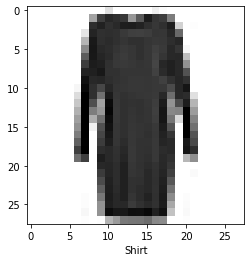

In [0]:
# Try different sample numbers predict what different images are
Sample_number = 301

# First, we will display this image so we can see what it looks like
plt.imshow(X_test[Sample_number], cmap=plt.cm.binary)
plt.xlabel(class_names[y_train[Sample_number]])

# Now will will have the model try to predict how likely this image is to be each class
predicted_probability = model.predict(X_test[Sample_number:Sample_number+1])
print ("The probability of each class: ", predicted_probability.round(2))

# Finally we will simply have the model select the category with the highest probability
predicted_class = model.predict_classes(X_test[Sample_number:Sample_number+1])
print ("The predicted class number is: ", predicted_class )
print ("The predicted class is: ", class_names[predicted_class[0]] )
print ("The correct class is: ", class_names[y_test[Sample_number]] )

# Section 3: Iris Flowers 
=== *You must run Section 0 before this section* ===




## Neural Networks to Classify Iris Flowers

Remember the iris flower data set has four features for each flower. Each flower is in one of three species of Iris.

We will train a simple neural network to learn to classify the Iris flowers

First we will read in the Iris database...

In [0]:
# Read in the iris data file from stored in a raw file in GitHub
url_iris = 'https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units3and4/master/Iris.csv'
iris = pd.read_csv(url_iris)
# Set the Id column as the index since it is unique for each flower
iris.set_index('Id', inplace=True)

species = iris['Species'].unique()


In [0]:
# Display the first 5 flowers to make sure the data was read in
iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Set up the input and output 
In the past we have called the input **"X"** and the output **"y"** but when working with multiple datasets we will use **"Xiris"** for the input features for the iris flower dataset. Likewise we will use **"yiris"** for the output categories for the iris flowers.


**Scale Data:** Neural Networks work best when the inputs are between -1 and +1, so the MinMaxScaler is used to scale all the inputs to the range 0 to +1.


**Split the Data:** The Iris data is split with 80% used for training and 20% used for testing.

**One-Hot Encoding:** Neural Networks like the output as one-hot encoding. This is a list of values, one for each category, which are all zeros except one which is 1 which represents the correct category.

So, if we have three iris species, we map each one to a one-hot encoding:
- Iris-setosa = [ 1, 0, 0 ]
- Iris-virginica  = [ 0, 1, 0 ]
- Iris-versicolor = [ 0, 0, 1 ]


In [0]:
input_Size = 4
output_Size = 3

feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
Xiris = iris[feature_columns].values
# We need the species labels converted to numbers for the neural network
yiris = LabelEncoder().fit_transform(iris["Species"])

# Scale the input data
mmScaler = MinMaxScaler()
Xiris = mmScaler.fit_transform(Xiris)

# Split the data into 80% for training and 20% for testing out the models
X_train, X_test, y_train, y_test = train_test_split(Xiris, yiris.ravel(), test_size=0.2)

# Format the output as one-hot encodings. Each output has three values with only one with a value of 1
# to_categoryical is defined in tf.keras.utils
y_train = to_categorical(y_train, output_Size)
y_test = to_categorical(y_test, output_Size)

print ("X_train training data is 120 flowers with 4 features each: " ,X_train.shape)
print ("X_test testing data is 30 flowers with 4 features each: " ,X_test.shape)

print ("y_train output is 1 of 3 species for 120 flowers: " ,y_train.shape)
print ("y_test output is 1 of 3 species for 30 flowers: : " ,y_test.shape)

X_train training data is 120 flowers with 4 features each:  (120, 4)
X_test testing data is 30 flowers with 4 features each:  (30, 4)
y_train output is 1 of 3 species for 120 flowers:  (120, 3)
y_test output is 1 of 3 species for 30 flowers: :  (30, 3)


## Build the Neural Network 

The following code sets up a sequential, four layer neural network. Sequential means that each layer is connected to the layer listed before it:
- Input layer: Input values are assigned to these units
- Hidden layer 1: 8 units using Rectified Linear Units (relu)
- Hidden layer 2: 6 units using Rectified Linear Units (relu)
- Output  layer: 3 units using softmax so sum of the three units will be 1.0

![neural network diagram](https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units7and8/master/Iris%20Neural%20Network.png)

## Compile Neural Network

This builds the Neural network. You must specify 
- optimizer = 'Adam' is a common gradient descent method for changing the weights during training. We will study the differnt optimizers in a future unit
- loss =  'categorical_crossentropy' is used when you have a number of distinct categories and items can only be in one category.
- metrics = 'accuracy' will output the accuracy of the classification, the percent of time the network gets the classification correct

## Train the Neural Network

This will run all 120 training flowers through the network and update the weights. The 30 testing flowers are then used to validate the model. 

- "epochs = 50" means to run the training 50 times. 
- Performance measures:
 - loss: a measurement of how far the outputs are from the desired outputs. This should get smaller over time.
 - accuracy: the prediction accuracy as a percent, so 0.67 means the model predicts the correct flower 67% of the time. 
 - val_loss: the loss calculated using the testing flowers rather than the training flowers.
 - val_accuracy: the accuracy calculated using the testing flowers rather than the training flowers.

## Plot the Training History

We store the performance during training in a variable named 'history'. The x-axis is the training time or number of epochs.

- Accuracy: Accuracy of the predictions, hopefully this is increasing to near 1.0 or 100%
- Loss: How close the output is to the desired output, this should decrease to near 0.0

Neural Network Model created
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_40 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_41 (Dense)             (None, 3)                 21        
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 0s 36ms/step - loss: 1.0832 - accuracy: 0.4417 - val_loss: 1.0520 - val_accuracy: 0.5667
Epoch 2/50
4/4 [==============================] - 0s 10ms/step - loss: 1.0755 - accuracy: 0.5167 - val_loss: 1.0477 - val_accuracy: 0.6333
Epoch 3/50
4/4 [==============================] - 0s 11ms/step - loss: 1.0687 

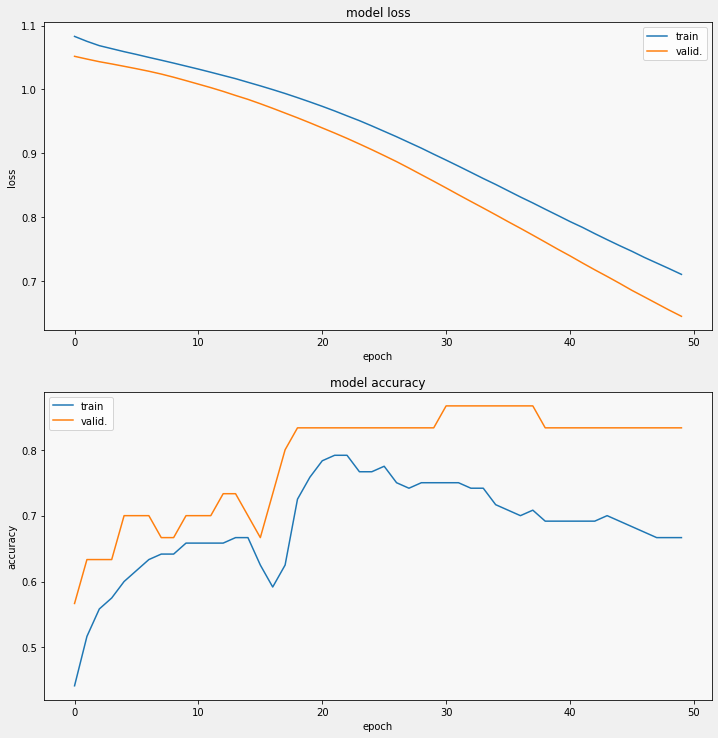

In [0]:
# Set up the Neural Network
input_Size = 4
output_Size = 3
Iris_neuralNetwork = Sequential()
Iris_neuralNetwork.add(Dense(20, activation='relu', input_dim=(input_Size)))
Iris_neuralNetwork.add(Dense(20, activation='relu'))
Iris_neuralNetwork.add(Dense(10, activation='relu'))
Iris_neuralNetwork.add(Dense(output_Size, activation='softmax'))

print ("Neural Network Model created")
Iris_neuralNetwork.summary()

# Compile neural network model
Iris_neuralNetwork.compile(
    optimizer='Adam',                        
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

# Fit model on training data for network with dense input layer
history = Iris_neuralNetwork.fit(X_train, y_train,
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test))

# We will display the loss and the accuracy of the model for each epoch
# NOTE: this is a little fancy display than is shown in the textbook
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 211)
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 212)

# Evaluate model on test data
print ("Running final scoring on test data")
score = Iris_neuralNetwork.evaluate(X_test, y_test, verbose=1)
print ("The accuracy for this model is ", format(score[1], ",.2f"))

## Task 3: Improving the Network

Answer the following questions inthe [Unit 3 Writeup](https://docs.google.com/document/d/1tA9mpPPjr1Y8FhZgXRDzyleiWEo0-DsIEKtPCbXZIe8/copy).

- 3.1. What is the training accuracy, acc, and the testing accuracy, val_acc, of the model?

- 3.2. Change the number of epochs used during training from 50 to 200 and re-run the code above re-train the network after change the number of epochs. What accuracy did you achieve?
 
- 3.3. Try more hidden layers with more nodes in each layer. The more hidden layers, the  more internal features the network can learn. Try changing the number of nodes in each hidden layer to larger numbers. How accurate can you get the network? 


## Prediction
Once we have trained or fit the model to the data, we can use it to make predictions.

Here we will predict the iris species for a new flower with 
- SepalLengthCm = 5.2	
- SepalWidthCm = 3.3
- PetalLengthCm = 1.4
- PetalWidthCm	= 0.2

This should be a Iris-setosa

Change the code below to make a prediction for a new flower with the following measurements.
 - SepalLengthCm = 4.2	
 - SepalWidthCm = 3.0
 - PetalLengthCm = 3.4
 - PetalWidthCm	= 1.2
 
 What Iris species does the network predict for this flower?

In [0]:
# The parameter order is SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
flowerMeasurements = [ [5.2, 3.3, 1.4, 0.2] ]

# Scale the data since the original training data was scaled
flowerMeasurements = mmScaler.transform(flowerMeasurements)
flowerMeasurements = flowerMeasurements.reshape(1, -1) 

# Use the neural network to generate the prediction
prediction = Iris_neuralNetwork.predict(flowerMeasurements)

# The prediction is a score for how likely each species is, the highest value corresponds to the predicted species
print ("Predicted score for each Iris species is ", prediction)
# [ 0.994  0.005  0.00002]

# select the index with the maximum probability
irisNum = np.argmax(prediction)
print ("This flower is of type : ", species[irisNum])

Predicted score for each Iris species is  [[0.6412019  0.23834309 0.12045494]]
This flower is of type :  Iris-setosa


# Section 4: Breast Cancer Data
=== *You must run Section 0 before this section* ===
### Neural Networks with the cancer dataset
The following code loads in the breast cancer dataset

In [0]:
 
  # Read in the breast cancer data file from stored in a raw file in GitHub
url_bc = 'https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units3and4/master/breast-cancer-wisconsin-data.csv'

cancer = pd.read_csv(url_bc)
# Set the Id column as the index since it is unique for each pati
cancer.set_index('id', inplace=True)

In [0]:
# Display the first 5 rows at the start, or head, of the dataframe
cancer.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Set up the Input and output, X and y

Here we will use Xcancer and ycancer instead of X and y for the input features and output categories.

This data set has 569 tumors with 30 features on each tumor, along with each tumor's category as Benign or Malignant.

**Scale Data:** Neural Networks work best when the inputs are between -1 and +1, so the MinMaxScaler is used to scale all the inputs to the range 0 to +1.

**Split the Data:** The Iris data is split with 80% used for training and 20% used for testing.

**One-Hot Encoding:** Neural Networks like the output as one-hot encoding. This is a list of values, one for each category, which are all zeros except one which is 1 which represents the correct category.

So, if we have two outputs, benign or malignant, we map each one to a one-hot encoding:
- Benign = [ 0, 1 ]
- Malignant  = [ 1, 0 ]


In [0]:
#from tensorflow.keras.utils import to_categorical

input_Size = 30
output_Size = 2

# === Select all the data for input ===
Xcancer = cancer.iloc[:, 1:31] 
# The output is the diagnosis where M is Malignant and B is Benign
# We need the diagnosis labels converted to numbers for the neural network
ycancer = LabelEncoder().fit_transform(cancer["diagnosis"])

# Scale the input data
mmScaler = MinMaxScaler()
Xcancer = mmScaler.fit_transform(Xcancer)

# Split the data into 80% for training and 20% for testing out the models
X_train, X_test, y_train, y_test = train_test_split(Xcancer, ycancer.ravel(), test_size=0.2)

# Format the output as one-hot encodings. Each output has two values with only one with a value of 1
y_train = to_categorical(y_train, output_Size)
y_test = to_categorical(y_test, output_Size)

In [0]:
print ("X_train training data is 455 tumors with 30 features each: " ,X_train.shape)
print ("X_test testing data is 114 tumors with 30 features each: " ,X_test.shape)

print ("y_train output is 1 of 2 diagnosis for 455 tumors: " ,y_train.shape)
print ("y_test output is 1 of 2 diagnosis for 114 tumors: : " ,y_test.shape)

X_train training data is 455 tumors with 30 features each:  (455, 30)
X_test testing data is 114 tumors with 30 features each:  (114, 30)
y_train output is 1 of 2 diagnosis for 455 tumors:  (455, 2)
y_test output is 1 of 2 diagnosis for 114 tumors: :  (114, 2)


## Neural Network

The following code sets up a sequential, four layer neural network. Sequential means that each layer is connected to the layer listed before it:
- Input layer: 30 tumor features used as input values
- Hidden layer 1: 10 units using Rectified Linear Units (relu)
- Hidden layer 2: 5 units using Rectified Linear Units (relu)
- Output  layer: 2 units using softmax to predict if tumor is benign or malignant


### Neural Network








In [0]:
# Set up the Neural Network

input_Size = 30
output_Size = 2

Cancer_neuralNetwork = Sequential()
Cancer_neuralNetwork.add(Dense(10, activation='relu', input_dim=(input_Size)))
Cancer_neuralNetwork.add(Dense(5, activation='relu'))
Cancer_neuralNetwork.add(Dense(output_Size, activation='softmax'))

print ("Neural Network created")
model.summary()


Neural Network created
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_34 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Compile Neural Network

This builds the Neural network. You must specify 
- optimizer = 'adam' is a common gradient descent method for changing the weights during training
- loss =  'categorical_crossentropy' is used when you have a number of distinct categories and items can only be in one category.
- metrics = 'accuracy' will output the accuracy of the classification, the percent of time the network gets the classification correct

In [0]:
# Compile neural network model
Cancer_neuralNetwork.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the Neural Network

This will run all 120 training flowers through the network and update the weights. The 30 testing flowers are then used to validate the model. 

- "epochs = 50" means to run the training 50 times. 
- Performance measures:
 - loss: a measurement of how far the outputs are from the desired outputs. This should get smaller over time.
 - acc: the prediction accuracy as a percent so 0.67 means the model predicts the correct flower 67% of the time. 
 - val_loss: the loss calculated using the testing flowers rather than the training flowers.
 - val_acc: the accuracy calculated using the testing flowers rather than the training flowers.
 
 
Note: sometimes training will take minutes, if not hours to run, especially later when we get to complex networks

## Plot the Training History

We store the performance during training in a variable named 'history'. The x-axis is the training time or number of epochs.

- Accuracy: Accuracy of the predictions; hopefully this is increasing to near 1.0
- Loss: How close the output is to the desired output; this should decrease to near 0.0

Epoch 1/50
5/5 - 0s - loss: 0.6902 - accuracy: 0.4066 - val_loss: 0.6966 - val_accuracy: 0.3772
Epoch 2/50
5/5 - 0s - loss: 0.6826 - accuracy: 0.4330 - val_loss: 0.6891 - val_accuracy: 0.4035
Epoch 3/50
5/5 - 0s - loss: 0.6757 - accuracy: 0.4681 - val_loss: 0.6833 - val_accuracy: 0.4298
Epoch 4/50
5/5 - 0s - loss: 0.6685 - accuracy: 0.5033 - val_loss: 0.6776 - val_accuracy: 0.4912
Epoch 5/50
5/5 - 0s - loss: 0.6614 - accuracy: 0.5297 - val_loss: 0.6715 - val_accuracy: 0.5263
Epoch 6/50
5/5 - 0s - loss: 0.6541 - accuracy: 0.5626 - val_loss: 0.6649 - val_accuracy: 0.5789
Epoch 7/50
5/5 - 0s - loss: 0.6467 - accuracy: 0.6132 - val_loss: 0.6578 - val_accuracy: 0.6140
Epoch 8/50
5/5 - 0s - loss: 0.6388 - accuracy: 0.6484 - val_loss: 0.6503 - val_accuracy: 0.6404
Epoch 9/50
5/5 - 0s - loss: 0.6308 - accuracy: 0.6725 - val_loss: 0.6421 - val_accuracy: 0.6667
Epoch 10/50
5/5 - 0s - loss: 0.6222 - accuracy: 0.6967 - val_loss: 0.6335 - val_accuracy: 0.7018
Epoch 11/50
5/5 - 0s - loss: 0.6132 - a

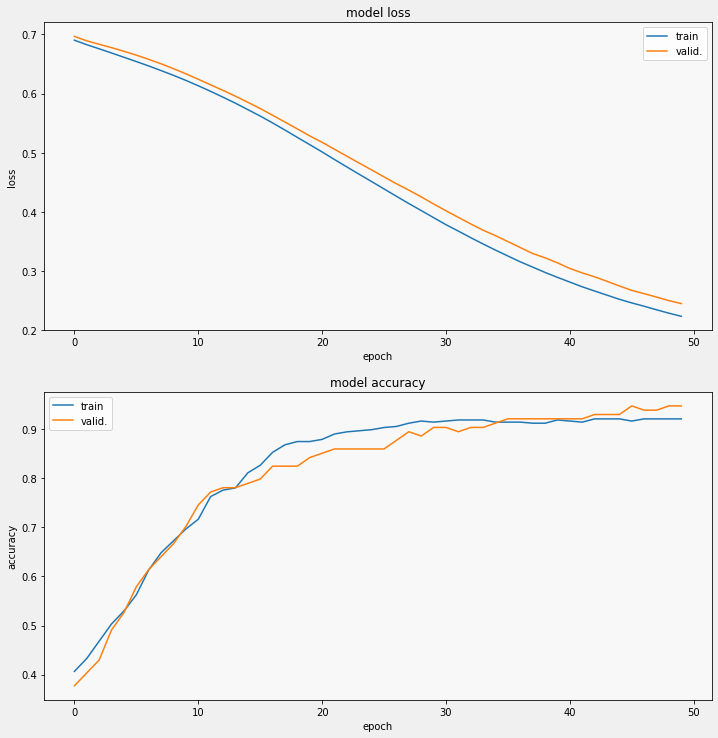

In [0]:
# Define the batch size and epochs.  
batch_size = 100    # batch size is the number of training samples per batch.
epochs = 50         # epochs is the number of batches to train over

# Fit model on training data for network
history = Cancer_neuralNetwork.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(X_test, y_test))

# We will display the loss and the accuracy of the model for each epoch
# NOTE: this is a little fancy display than is shown in the textbook
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

# We store the performance during training in a variable named 'history'. The x-axis is the training time or number of epochs.
#    Accuracy: Accuracy of the predictions; hopefully this is increasing to near 1.0
#    Loss: How close the output is to the desired output; this should decrease to near 0.0
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 211)
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 212)


## Task 4: Increasing the Accuracy of Cancer Predictions

In Project 2 you tried a number of different classification methods with the breast cancer data. Here are some typical results from Project 2:

- K-Nearest Neighbors (KNN): 94%
- Support Vector Machine (SVM): 96%
- Decision Trees (DT): 94%

Answer the following questions in the  [ Learning 7 Writeup](https://docs.google.com/document/d/17iagVfSIk6TgYw3r5CVWO8DcZkcmBfI-On4bPkMxSFA/edit?usp=sharing).

Question 4.1: How accurate is the original network with hidden layers of 10 & 5 units trained for 50 epohs?

Question 4.2: How high of an accuracy can you get by adding more hidden units and training for more epochs? What configuration gave you the best results?

Question 4.3: Do neural networks seem comparable in this task with KNN, SVM and DT?

In [0]:
# Evaluate model on test data
print ("Running final scoring on test data")
score = Cancer_neuralNetwork.evaluate(X_test, y_test, verbose=1)
print ("The accuracy for this model is ", format(score[1], ",.2f"))

Running final scoring on test data
4/4 [==============================] - 0s 2ms/step - loss: 0.2452 - accuracy: 0.9474
The accuracy for this model is  0.95
